# Market demand assessment
*This notebook illustrates methods to assess the demand series of a supply chain.*  
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano 2020

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

from IPython.display import display, HTML #display dataframe

#import utilities
from logproj.utilities import creaCartella

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from logproj.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=500)


In [4]:
#print nodes dataframe
display(HTML(D_mov.to_html()))

,LOADING_NODE,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION
0,8,41.472013,14.163782,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-02 00:00:01.288836,2020-01-02 00:19:47.531364,9,41.427644,14.822465,2020-01-02 15:25:04.782466,2020-01-02 16:25:04.782466,2020-01-02 15:35:32.773484,2020-01-02 16:17:23.211431,0,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,6.942918,2019-12-29 04:51:40.487618,TEU CONTAINER
0,3,41.430179,14.782304,2020-01-02 20:14:46.251457,2020-01-02 21:14:46.251457,2020-01-02 20:34:54.823785,2020-01-02 21:35:13.347401,0,41.918846,14.003587,2020-01-04 13:06:57.611925,2020-01-04 14:06:57.611925,2020-01-04 12:53:50.521849,2020-01-04 13:29:23.218765,0,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,4.733407,2019-12-25 12:29:48.882362,FEU CONTAINER
0,22,41.743610,14.679587,2020-01-04 14:07:13.442965,2020-01-04 15:07:13.442965,2020-01-04 14:20:24.921407,2020-01-04 15:23:02.380716,8,41.472013,14.163782,2020-01-05 02:54:05.515975,2020-01-05 03:54:05.515975,2020-01-05 03:03:48.787861,2020-01-05 03:46:05.467349,0,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,9.256804,2020-01-04 09:45:51.188337,FEU CONTAINER
0,6,41.655651,14.179870,2020-01-05 04:36:37.094037,2020-01-05 05:36:37.094037,2020-01-05 04:41:21.767208,2020-01-05 05:33:30.780683,22,41.743610,14.679587,2020-01-05 03:39:25.131540,2020-01-05 04:39:25.131540,2020-01-05 03:31:43.650835,2020-01-05 04:31:40.968493,1,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,7.254667,2020-01-03 21:37:20.624824,FEU CONTAINER
0,23,41.634512,14.218678,2020-01-05 05:03:08.290667,2020-01-05 06:03:08.290667,2020-01-05 05:02:35.511491,2020-01-05 05:58:41.069507,13,41.713935,14.386598,2020-01-05 11:04:50.994874,2020-01-05 12:04:50.994874,2020-01-05 11:13:01.433231,2020-01-05 11:50:53.874819,1,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,1.380361,2020-01-03 06:52:50.877252,TEU CONTAINER
0,9,41.427644,14.822465,2020-01-05 13:58:59.348993,2020-01-05 14:58:59.348993,2020-01-05 14:16:15.891751,2020-01-05 14:47:02.110585,9,41.427644,14.822465,2020-01-05 14:58:59.348993,2020-01-05 15:58:59.348993,2020-01-05 14:56:30.263914,2020-01-05 16:03:06.491251,1,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,5.931270,2020-01-03 19:06:51.440065,FEU CONTAINER
0,13,41.713935,14.386598,2020-01-05 16:07:32.978245,2020-01-05 17:07:32.978245,2020-01-05 16:07:01.173186,2020-01-05 17:22:21.572348,3,41.430179,14.782304,2020-01-06 11:39:35.337404,2020-01-06 12:39:35.337404,2020-01-06 11:34:56.235110,2020-01-06 12:53:58.094400,0,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,3.316449,2020-01-03 23:00:43.255602,FEU CONTAINER
0,5,41.662059,14.453091,2020-01-06 15:16:25.430221,2020-01-06 16:16:25.430221,2020-01-06 15:21:51.342305,2020-01-06 16:16:18.687037,19,41.598220,14.832670,2020-01-07 03:01:46.107164,2020-01-07 04:01:46.107164,2020-01-07 03:06:58.275258,2020-01-07 04:10:18.526379,1,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,1.571204,2019-12-29 09:10:39.057138,FEU CONTAINER
0,18,41.816229,14.224814,2020-01-07 06:06:37.997599,2020-01-07 07:06:37.997599,2020-01-07 06:07:40.146073,2020-01-07 07:21:20.811422,15,41.519790,14.384520,2020-01-07 19:00:55.036054,2020-01-07 20:00:55.036054,2020-01-07 18:56:37.676366,2020-01-07 19:57:36.637661,0,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,1.777309,2020-01-07 03:28:43.536779,FEU CONTAINER
0,9,41.427644,14.822465,2020-01-07 21:09:23.107212,2020-01-07 22:09:23.107212,2020-01-07 21:09:30.318634,2020-01-07 21:49:43.920324,5,41.662059,14.453091,2020-01-08 17:42:09.171016,2020-01-08 18:42:09.171016,2020-01-08 17:39:33.319460,2020-01-08 18:15:10.655188,0,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,8.052012,2020-01-07 20:00:06.252520,TEU CONTAINER


### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
_, root_path = creaCartella(pathResults,f"{string_casestudy}_results")
_, path_results = creaCartella(root_path,f"P9_demandAssessment")

Cartella TOY_DATA_results già esistente
Cartella P9_demandAssessment già esistente


### Build the time series

In [6]:
D_time = D_mov.groupby(['TIMESTAMP_IN']).agg({'QUANTITY':['sum'],'TIMESTAMP_IN':['size']}).reset_index()
D_time.columns = ['TIMESTAMP', 'QUANTITY','COUNT']
#print the series
display(HTML(D_time.to_html()))

,TIMESTAMP,QUANTITY,COUNT
0,2019-11-27 04:35:23.715549,9.156381,1
1,2019-12-20 21:52:49.104559,1.767732,1
2,2019-12-24 07:21:24.506497,9.775512,1
3,2019-12-24 22:36:24.501448,7.228324,1
4,2019-12-25 12:29:48.882362,4.733407,1
5,2019-12-28 19:08:20.604916,8.294298,1
6,2019-12-29 04:51:40.487618,6.942918,1
7,2019-12-29 09:10:39.057138,1.571204,1
8,2019-12-30 18:37:07.942536,4.530058,1
9,2019-12-31 10:58:04.528325,4.216987,1


### Plot weekly trend

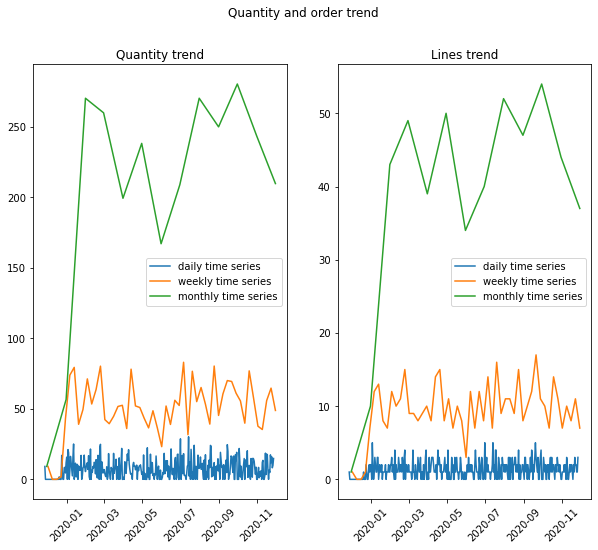

In [7]:
#summary plot of the time series
from logproj.P9_workloadPrediction.demand_assessment import plotQuantityTrendWeeklyDaily
fig = plotQuantityTrendWeeklyDaily(D_temp=D_time,  
                                   date_field='TIMESTAMP', 
                                   filterVariable=[], 
                                   filterValue=[],  
                                   quantityVariable = 'QUANTITY', 
                                   countVariable = 'COUNT', 
                                   titolo='Quantity and order trend')
fig.savefig(f"{path_results}\\GlobalTrendWeek.png")

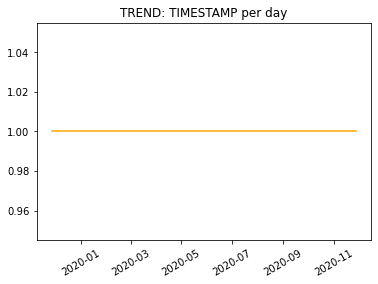

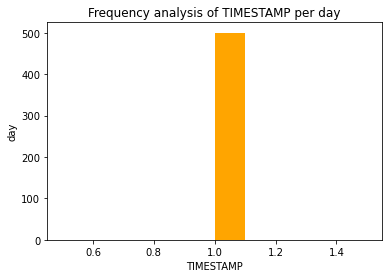

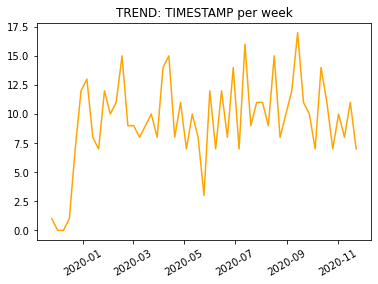

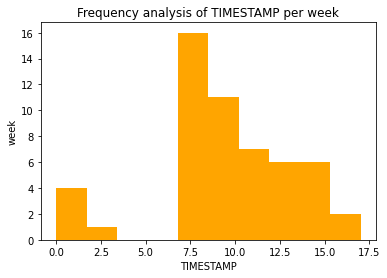

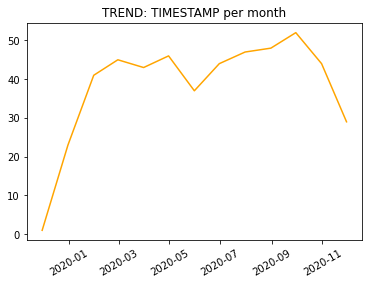

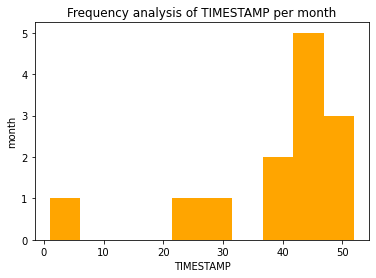

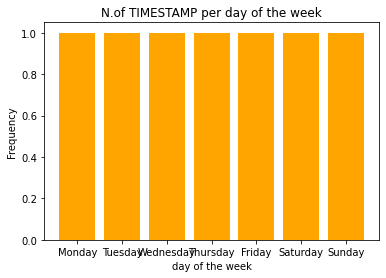

In [8]:
#plot with different level of aggregation
from logproj.P9_workloadPrediction.demand_assessment import bookingStatistics
imageResults, dataframeResults = bookingStatistics(D_mov=D_time,
                                                   capacityField='QUANTITY',
                                                   timeVariable='TIMESTAMP',
                                                   samplingInterval=['day','week','month'])
# salvo figure
for key in imageResults.keys():
    imageResults[key].savefig(path_results+f"\\{key}.png")
    
# salvo dataframe
for key in dataframeResults.keys():
    dataframeResults[key].to_excel(path_results+f"\\{key}.xlsx")

### Analyse correlations of the input dataset

In [9]:
from logproj.ml_dataCleaning import dummyColumns
from logproj.ml_explore import correlationMatrix

#create dummy dataframe for correlation analysis
D_mov_dummy=dummyColumns(D_mov)


#print the series
display(HTML(D_mov_dummy.to_html()))

,LOADING_NODE,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PRODUCT_FAMILY 1,PRODUCT_FAMILY 2,CLIENT 1,CLIENT 2,TRUCK 1,FEU CONTAINER,TEU CONTAINER
0,8,41.472013,14.163782,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-02 00:00:01.288836,2020-01-02 00:19:47.531364,9,41.427644,14.822465,2020-01-02 15:25:04.782466,2020-01-02 16:25:04.782466,2020-01-02 15:35:32.773484,2020-01-02 16:17:23.211431,0,0,6.942918,2019-12-29 04:51:40.487618,0,1,0,1,1,0,1
0,3,41.430179,14.782304,2020-01-02 20:14:46.251457,2020-01-02 21:14:46.251457,2020-01-02 20:34:54.823785,2020-01-02 21:35:13.347401,0,41.918846,14.003587,2020-01-04 13:06:57.611925,2020-01-04 14:06:57.611925,2020-01-04 12:53:50.521849,2020-01-04 13:29:23.218765,0,0,4.733407,2019-12-25 12:29:48.882362,0,1,0,1,1,1,0
0,22,41.743610,14.679587,2020-01-04 14:07:13.442965,2020-01-04 15:07:13.442965,2020-01-04 14:20:24.921407,2020-01-04 15:23:02.380716,8,41.472013,14.163782,2020-01-05 02:54:05.515975,2020-01-05 03:54:05.515975,2020-01-05 03:03:48.787861,2020-01-05 03:46:05.467349,0,0,9.256804,2020-01-04 09:45:51.188337,0,1,0,1,1,1,0
0,6,41.655651,14.179870,2020-01-05 04:36:37.094037,2020-01-05 05:36:37.094037,2020-01-05 04:41:21.767208,2020-01-05 05:33:30.780683,22,41.743610,14.679587,2020-01-05 03:39:25.131540,2020-01-05 04:39:25.131540,2020-01-05 03:31:43.650835,2020-01-05 04:31:40.968493,1,0,7.254667,2020-01-03 21:37:20.624824,1,0,1,0,1,1,0
0,23,41.634512,14.218678,2020-01-05 05:03:08.290667,2020-01-05 06:03:08.290667,2020-01-05 05:02:35.511491,2020-01-05 05:58:41.069507,13,41.713935,14.386598,2020-01-05 11:04:50.994874,2020-01-05 12:04:50.994874,2020-01-05 11:13:01.433231,2020-01-05 11:50:53.874819,1,0,1.380361,2020-01-03 06:52:50.877252,1,0,1,0,1,0,1
0,9,41.427644,14.822465,2020-01-05 13:58:59.348993,2020-01-05 14:58:59.348993,2020-01-05 14:16:15.891751,2020-01-05 14:47:02.110585,9,41.427644,14.822465,2020-01-05 14:58:59.348993,2020-01-05 15:58:59.348993,2020-01-05 14:56:30.263914,2020-01-05 16:03:06.491251,1,0,5.931270,2020-01-03 19:06:51.440065,1,0,1,0,1,1,0
0,13,41.713935,14.386598,2020-01-05 16:07:32.978245,2020-01-05 17:07:32.978245,2020-01-05 16:07:01.173186,2020-01-05 17:22:21.572348,3,41.430179,14.782304,2020-01-06 11:39:35.337404,2020-01-06 12:39:35.337404,2020-01-06 11:34:56.235110,2020-01-06 12:53:58.094400,0,0,3.316449,2020-01-03 23:00:43.255602,0,1,1,0,1,1,0
0,5,41.662059,14.453091,2020-01-06 15:16:25.430221,2020-01-06 16:16:25.430221,2020-01-06 15:21:51.342305,2020-01-06 16:16:18.687037,19,41.598220,14.832670,2020-01-07 03:01:46.107164,2020-01-07 04:01:46.107164,2020-01-07 03:06:58.275258,2020-01-07 04:10:18.526379,1,0,1.571204,2019-12-29 09:10:39.057138,1,0,0,1,1,1,0
0,18,41.816229,14.224814,2020-01-07 06:06:37.997599,2020-01-07 07:06:37.997599,2020-01-07 06:07:40.146073,2020-01-07 07:21:20.811422,15,41.519790,14.384520,2020-01-07 19:00:55.036054,2020-01-07 20:00:55.036054,2020-01-07 18:56:37.676366,2020-01-07 19:57:36.637661,0,0,1.777309,2020-01-07 03:28:43.536779,0,1,1,0,1,1,0
0,9,41.427644,14.822465,2020-01-07 21:09:23.107212,2020-01-07 22:09:23.107212,2020-01-07 21:09:30.318634,2020-01-07 21:49:43.920324,5,41.662059,14.453091,2020-01-08 17:42:09.171016,2020-01-08 18:42:09.171016,2020-01-08 17:39:33.319460,2020-01-08 18:15:10.655188,0,0,8.052012,2020-01-07 20:00:06.252520,0,1,0,1,1,0,1


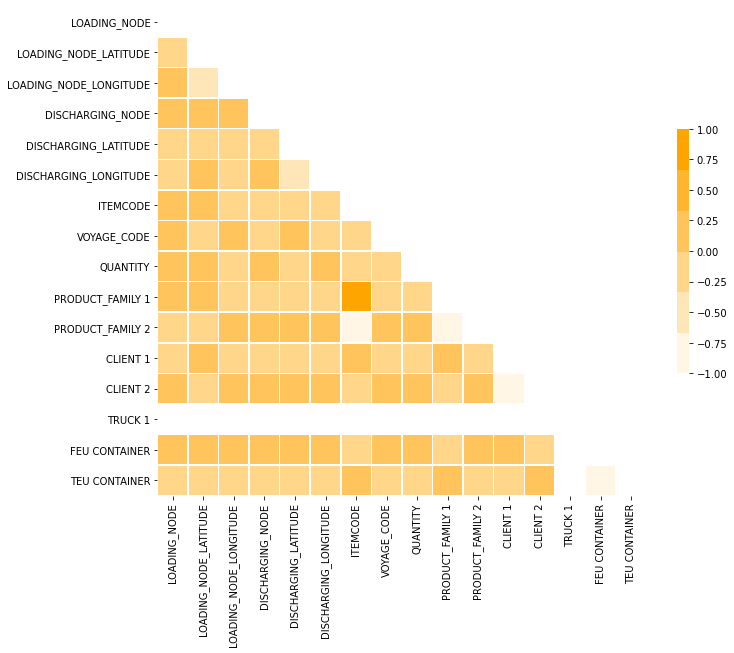

In [10]:
#generate correlation matrix
output_figures = correlationMatrix(D_mov_dummy,annotationCell=False)
# show and save figures
for key in output_figures.keys():
    output_figures[key].savefig(path_results+f"\\{key}.png")
output_figures['CorrelationMatrix']

### Decompose the time series

..\logproj\P9_workloadPrediction\demand_assessment.py:300: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(timeSeries_analysis, model=decompositionModel, freq=frequency)


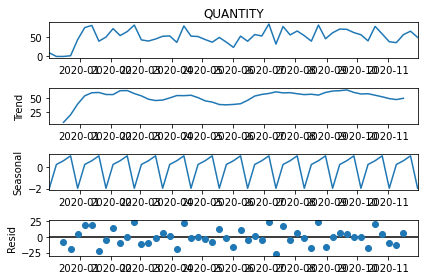

In [11]:
from logproj.P9_workloadPrediction.demand_assessment import decomposeTimeSeries

fig = decomposeTimeSeries(D_time = D_time, 
                                      seriesVariable='QUANTITY', 
                                      samplingInterval='week', 
                                      date_field='TIMESTAMP',  
                                      decompositionModel='additive')



Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month

..\logproj\P9_workloadPrediction\demand_assessment.py:299: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  return plt.figure()



Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month


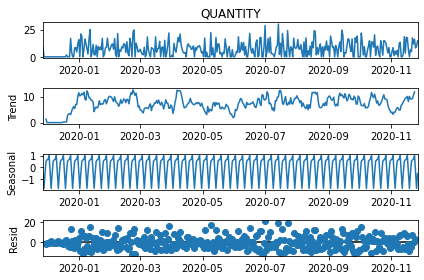

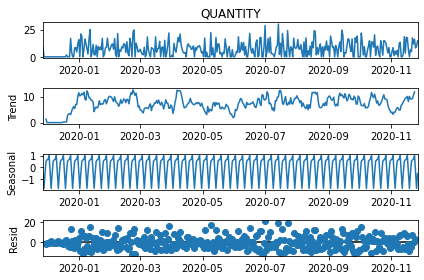

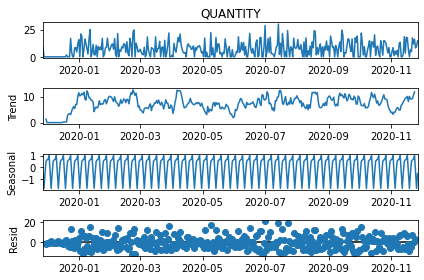

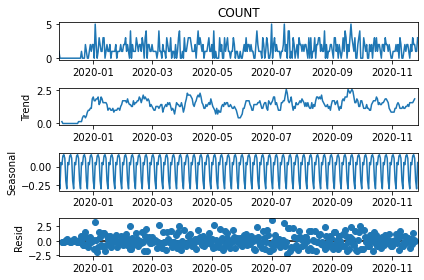

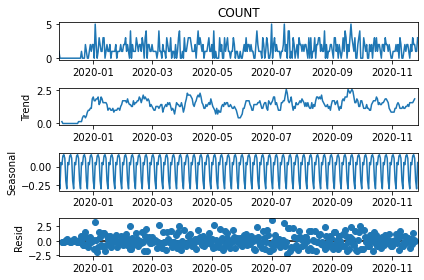

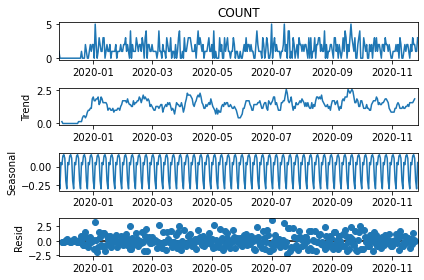

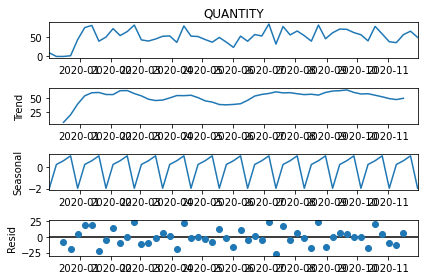

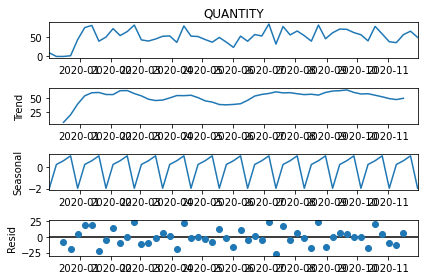

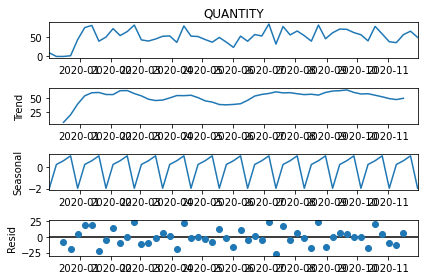

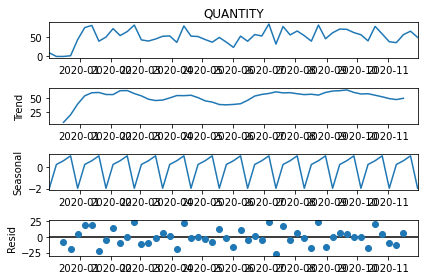

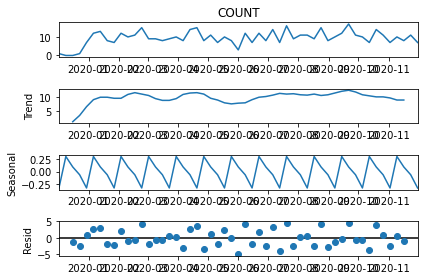

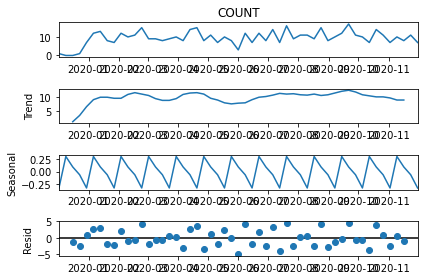

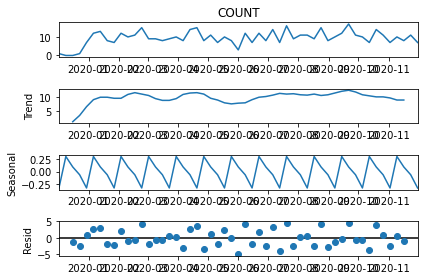

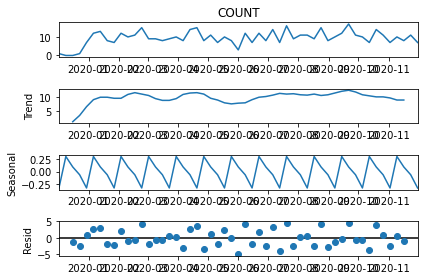

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
#test all the decompositions
variables = {'quantity':'QUANTITY', 'lines':'COUNT'}
samplingIntervals = ['day','week','month']
for samplingInterval in samplingIntervals:
    for var in variables.keys():
        seriesVariable = variables[var]
        for sampl_int in samplingInterval:
            fig = decomposeTimeSeries(D_time = D_time, 
                                      seriesVariable=seriesVariable, 
                                      samplingInterval=samplingInterval, 
                                      date_field='TIMESTAMP',  
                                      decompositionModel='additive')
            fig.savefig(f"{path_results}\\trend_decompose_{var}_{sampl_int}.png")

### Fourier analysis

..\logproj\stat_time_series.py:346: RuntimeWarning: divide by zero encountered in true_divide
  weeks=1/xf
..\logproj\P9_workloadPrediction\demand_assessment.py:331: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(1/D['Frequency_domain_value'], D['Amplitude'])


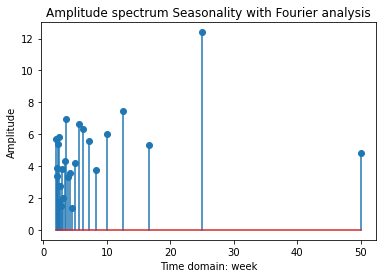

In [13]:
from logproj.P9_workloadPrediction.demand_assessment import seasonalityWithfourier
fig = seasonalityWithfourier(D_time=D_time, 
                             seriesVariable='QUANTITY', 
                             samplingInterval='week', 
                             date_field='TIMESTAMP',
                             titolo='Seasonality with Fourier analysis')




..\logproj\stat_time_series.py:346: RuntimeWarning: divide by zero encountered in true_divide
  weeks=1/xf
..\logproj\P9_workloadPrediction\demand_assessment.py:331: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(1/D['Frequency_domain_value'], D['Amplitude'])
..\logproj\stat_time_series.py:346: RuntimeWarning: divide by zero encountered in true_divide
  weeks=1/xf
..\logproj\P9_workloadPrediction\demand_assessment.py:331: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(1/D

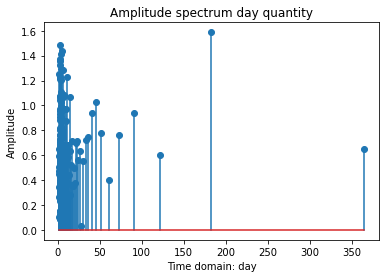

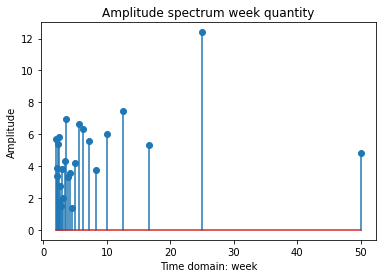

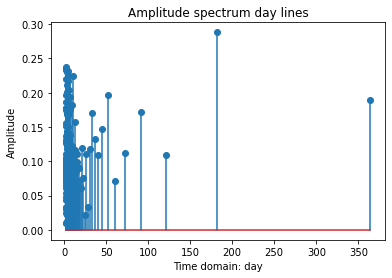

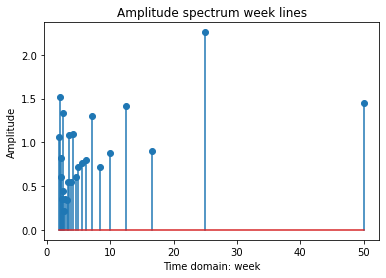

In [14]:
#test all the series
# %% STUDY SEASONALITY USING FOURIER TRANSFORM
for var in variables.keys():
    seriesVariable = variables[var]
    for sampl_int in ['day','week']:
        fig = seasonalityWithfourier(D_time, 
                                     seriesVariable, 
                                     samplingInterval=sampl_int, 
                                     date_field='TIMESTAMP',
                                     titolo=f"{sampl_int} {var}")
        fig.savefig(f"{path_results}\\fourier_decompose_{var}_{sampl_int}.png")